# **TABLA DE CONTENIDO**

- [Medidas de Centralidad](#centralidad)
- [Percentiles](#percentiles)
- [Medidas de Variabilidad](#variabilidad)
- [Diagrama de caja y bigotes](#caja_bigotes)
- [Desigualdad de Chebyshev](#chebyshev)

# Medidas de centralidad <a id="centralidad"></a>

Las medidas de centralidad sirven para determinar que valor de  es considerado el representativo, ya que *resumen los datos capturando su posición central*.

Entre sus principales propósitos están:

- Resumir el conjunto de datos (Reducción de complejidad)
- Identificar el valor representativo
- Facilitar la comparación entre conjuntos de datos
- Soporte para análisis posteriores.

---
*El valor de la medida de centralidad no necesariamente hace parte de las datos.*


## Media Arimética

En esta medida de centralidad todos los datos tienen la misma importancia $(\frac{1}{n})$. Es muy sensible en donde tenemos datos atípicos o con asimetria en su distribución.

Se define así:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$




## Media Ponderada
En ocasiones los datos no tienen la misma importancia $(w_{i})$. Útil cuando tenemos los datos agrupados por frecuencias.

Se define así:

$$\bar{x}_{\text{w}} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

## Media Geométrica

Cuando tenemos que encontrar un valor representativo de un problema tipo tasas de crecimiento, ya que los datos varian multiplicativamente.

Se define así:

$$\bar{x}_{\text{geo}} = \left( \prod_{i=1}^{n} x_i \right)^{\frac{1}{n}}$$



## Moda

- La moda es el valor que aparece con mayor frecuencia.
- Se utiliza para datos cualitativos o para identificar el valor más común en un conjunto de datos.
- No siempre existe.
- No tiene una fórmula matemática estándar, ya que se basa en la frecuencia de los datos.

## Mediana

La mediana es el valor que divide un conjunto de datos ordenado (menor - mayor) en dos partes iguales, de manera que el 50% de los valores están por debajo y el 50% están por encima.

Se define así:

- Si $n$ es imnpar: Es el valor en la posición $\frac{n+1}{2}$
- Si $n$ es par: Es el promedio de los valores en las posiciones $\frac{n}{2}$ y $(\frac{n}{2} + 1)$.

## Ejemplos para medidas de centralidad

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean

# data URL
url = "https://raw.githubusercontent.com/apolineo11/PYEF/main/Cuadernos/Data/Melbourne_housing_FULL.csv"


# Load the data into a DataFrame
data_housing = pd.read_csv(url, parse_dates=['Date'], date_format='%d/%m/%Y').dropna(subset='Distance').reset_index(drop=True)


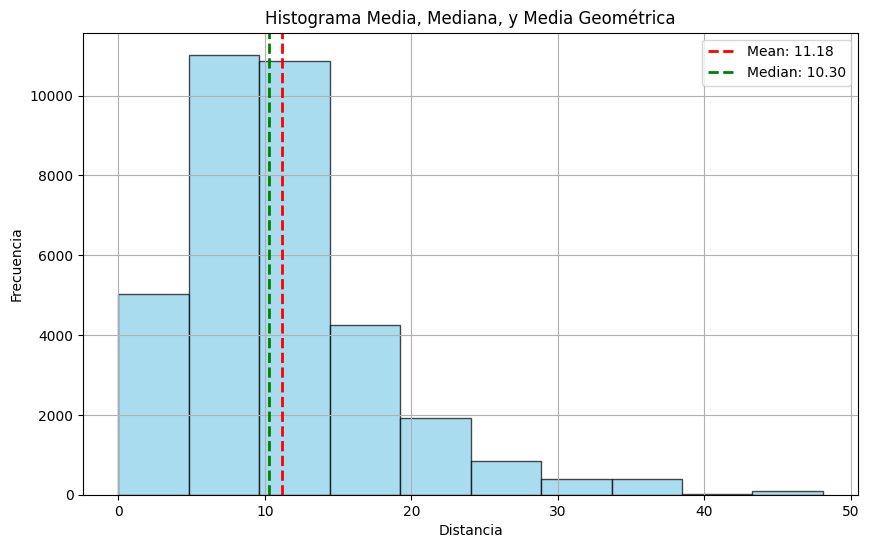

In [12]:
# Calculating Mean, Median, and Geometric Mean
mean_value = data_housing['Distance'].mean()
median_value = data_housing['Distance'].median()

# Plotting the histogram with vertical lines for Mean, Median, and Geometric Mean
plt.figure(figsize=(10, 6))
plt.hist(data_housing['Distance'], alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')

# Adding labels and legend
plt.title('Histograma Media, Mediana, y Media Geométrica')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Percentiles <a id="percentiles"></a>

El percentil $100p$ de la muestra es aquel valor de los datos tal que al menos el $100p$ por ciento de los datos son menores o iguales que él y al menos el $100(1 - p)$ por ciento son mayores o iguales que él. Si dos valores de datos cumplen esta condición, el percentil $100p$ de la muestra es la media aritmética de estos dos valores.

Para determinar el percentil $100p$ muestral de un conjunto de datos de tamaño n, necesitamos determinar los valores de los datos tales que:

1. Al menos np de los valores son menores o iguales que él.
2. Al menos n(1 - p) de los valores son mayores o iguales que él.

Los percentiles $100(0.25)$, $100(0.50)$ y $100(0.75)$, se denominan cuartiles  $Q_{1}$, $Q_{2}$, $Q_{3}$, respectivamente.

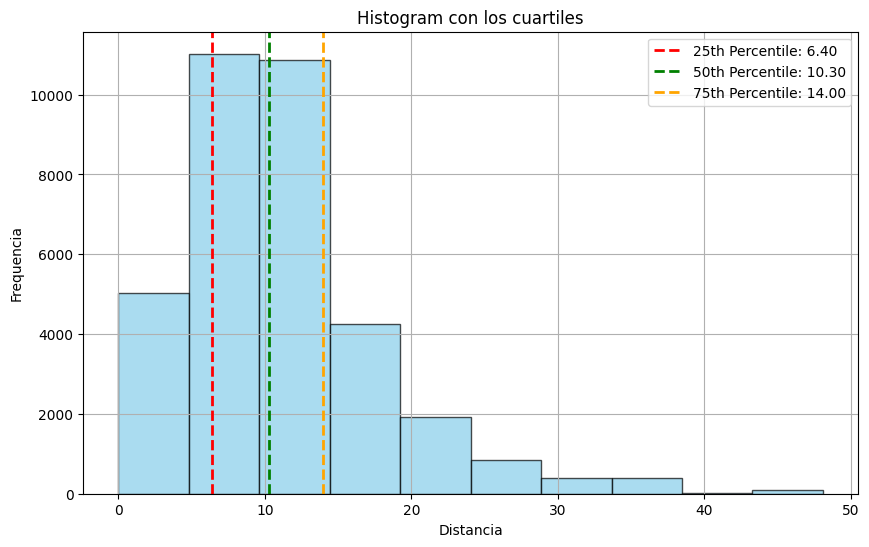

In [13]:
# Calculating the 20th, 40th, and 60th percentiles

percentile_25 = np.percentile(data_housing['Distance'], 25)
percentile_50 = np.percentile(data_housing['Distance'], 50)
percentile_75 = np.percentile(data_housing['Distance'], 75)

# Plotting the histogram with vertical lines for the percentiles
plt.figure(figsize=(10, 6))
plt.hist(data_housing['Distance'], alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(percentile_25, color='red', linestyle='--', linewidth=2, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_50, color='green', linestyle='--', linewidth=2, label=f'50th Percentile: {percentile_50:.2f}')
plt.axvline(percentile_75, color='orange', linestyle='--', linewidth=2, label=f'75th Percentile: {percentile_75:.2f}')

# Adding labels and legend
plt.title('Histogram con los cuartiles')
plt.xlabel('Distancia')
plt.ylabel('Frequencia')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Medidas de Variabilidad <a id="variabilidad"></a>

Son cifras descriptivas que miden la variabilidad o dispersión de las observaciones con respecto a la media.

## Rango

El rango nos da el dominio sobre el que se han realizado los datos recolectados.

$$\max(x_{n}) - \min(x_{n})$$

## Varianza poblacional

La varianza de una población de tamaño $N$ es la media de los cuadrados de las desviaciones de las respecto a su media.

$$\sigma^{2} = \frac{\sum(x_{i}-\mu)^{2}}{N}$$


## Varianza muestral

La varianza de una muestra de tamaño $n$ es la suma de los cuadrados de las desviaciones de las respecto a su media dividida por $(n-1)$.

$$s^{2} = \frac{\sum(x_{i}-\mu)^{2}}{(n-1)}$$


## Desviación estándar muestral

Es la raíz positiva de la varianza muestral y se nota $s$

## Desviación estándar poblacional

Es la raíz positiva de la varianza muestral y se nota $\sigma$




## Identidad algebraica

$$
\sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{n} x_i^2 - n \bar{x}^2
$$

La identidad se prueba así:

$$
\begin{align}
\sum_{i=1}^{n} (x_i - \bar{x})^2 &= \sum_{i=1}^{n} \left(x_i^2 - 2x_i \bar{x} + \bar{x}^2\right) \\
&= \sum_{i=1}^{n} x_i^2 - 2\bar{x} \sum_{i=1}^{n} x_i + n\bar{x}^2 \\
&= \sum_{i=1}^{n} x_i^2 - 2n\bar{x}^2 + n\bar{x}^2 \\
&= \sum_{i=1}^{n} x_i^2 - n\bar{x}^2
\end{align}
$$



---
Ejercicio:

Si $y_{i} = ax_{i} + b$

- ¿cuál el la varianza de la variable $y$?.




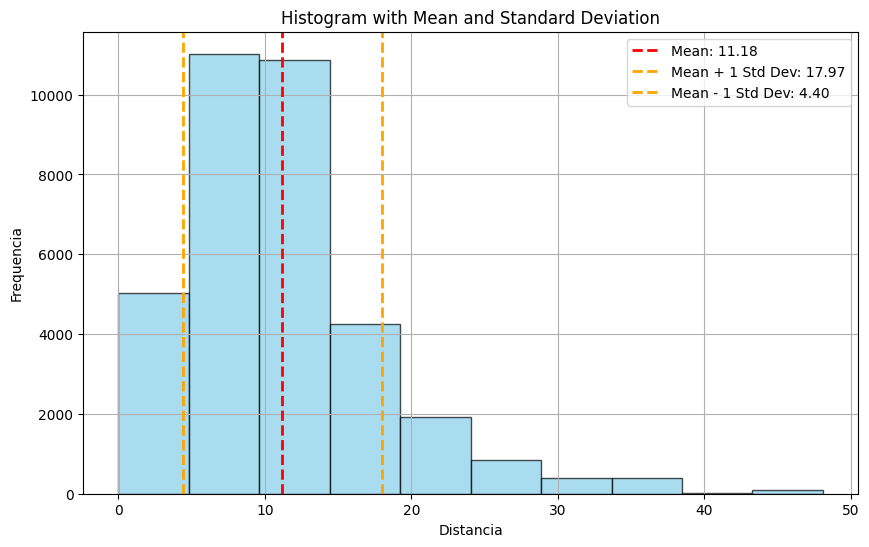

In [14]:
# Calcular la media y la desviación estándar
mean = np.mean(data_housing['Distance'])
std_dev = np.std(data_housing['Distance'])

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(data_housing['Distance'], alpha=0.7, color='skyblue', edgecolor='black')

# Añadir líneas para la media y la desviación estándar
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='--', linewidth=2, label=f'Mean + 1 Std Dev: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='orange', linestyle='--', linewidth=2, label=f'Mean - 1 Std Dev: {mean - std_dev:.2f}')

# Configuración del gráfico
plt.title('Histogram with Mean and Standard Deviation')
plt.xlabel('Distancia')
plt.ylabel('Frequencia')
plt.legend()
plt.grid(True)
plt.show()

# Diagrama de caja y bigotes <a id="cajas_bigotes"></a>

Un diagrama de cajas y bigotes es un gráfico que describe la forma de una distribución en términos del resumen de cinco números: el valor mínimo, el primer cuartil (percentil 25), la mediana (percentil 50), el tercer cuartil (percentil 75) y el valor máximo.


## Cálculo de los Bigotes (Whiskers) en un Boxplot:

1. Rango intercuartílico (IQR): $$IQR=Q3-Q1$$

2. Cálculo de los límites de los bigotes:

    - Bigote inferior: $$LI=Q1 - 1.5 \times IQR$$

    - Bigote superior: $$LS=Q3 + 1.5 \times IQR$$

3. Valores dentro de los bigotes: Los bigotes se extienden hasta el valor más bajo y más alto dentro del rango calculado. Cualquier dato que caiga fuera de este rango se considera un **atípico**
 y se muestra como un punto en el boxplot.


## Datos atípicos

> Llamaremos datos atípicos a aquellas observaciones que parecen haberse generado de forma distinta al resto de los datos. Pueden ser causadas por errores de medición o transcripción, cambios en el instrumento de medición o a heterogeneidad intrínseca de los elementos observados. Por ejemplo, supongamos que estamos estudiando las caracterÌsticas de las viviendas en una zona urbana donde la gran mayoría son pisos, pero se ha incluido en la muestra una gran vivienda unifamiliar con jardín. Esta observación ser atípica y corresponde a una heterogeneidad real de los datos. Es importante detectarla ya que obtendremos una mejor descripción de los datos separando ambos tipos de viviendas. (Peña, 2002).

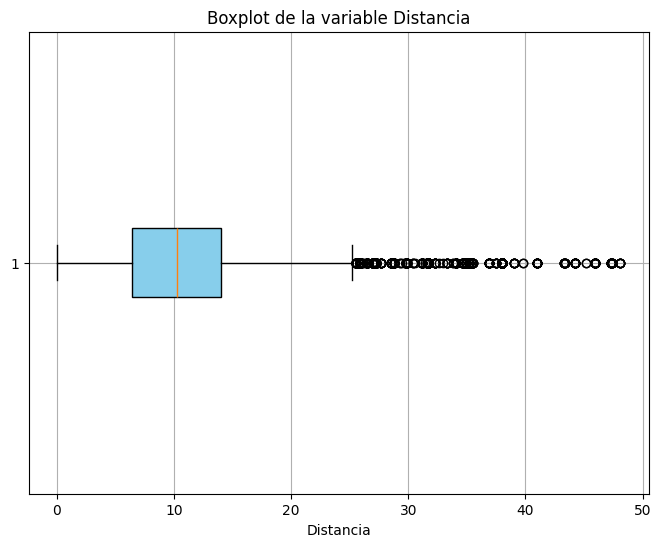

In [15]:
import matplotlib.pyplot as plt

# Plotting a boxplot for the dataset
plt.figure(figsize=(8, 6))
plt.boxplot(data_housing['Distance'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Boxplot de la variable Distancia')
plt.xlabel('Distancia')
plt.grid(True)
plt.show()


## Coeficiente de Variación

Es una medida de dispersión relativa que expresa la desviación típica como porcentaje de la media (siempre que ésta sea positiva).

- Poblacional: $$CV = \frac{\sigma}{\mu}$$
- Muestral: $$CV = \frac{s}{\bar{x}}$$

# Desigualdad de Chebyshev <a id="chebyshev"></a>

La desigualdad de nos asegura que para cualquier $k \geq 1$, existe un $100\left(1 - \frac{1}{k^{2}}\right)\%$ de los datos que se encuentran dentro del intervalo $\bar{x} \pm ks$.

## Postulado
Sea $\bar{x}$ y $s$, la media y desviación estándar muestral (respectivamente) de los datos $x_{1}, x_{2}, \dots, x_{n}$, con $s >0$.

$$S_{k}=\{x_{i}:|x_{i} - \bar{x}| < ks\}$$


Y sea $|S_{k}|$ el número de elementos del conjunto $S_{k}$.

Entonces para todo $k \geq 1$:

$$\frac{|S_k|}{n} \geq 1 - \frac{n - 1}{n k^2} > 1 - \frac{1}{k^2}$$

## Prueba de la desigualdad de Chebyshev


$$
\begin{align}
(n - 1) s^2 &= \sum_{i=1}^{n} (x_i - \bar{x})^2 \\
&= \sum_{i \in S_k} (x_i - \bar{x})^2 + \sum_{i \notin S_k} (x_i - \bar{x})^2 \\
&\geq \sum_{i \notin S_k} (x_i - \bar{x})^2 \\
&\geq \sum_{i \notin S_k} k^2 s^2 &= k^2 s^2 (n - |S_k|)\\
\end{align}
$$

Dividiendo los dos lados de la desigualdad por $nk^{2}s^{2}$ se tiene que:

$$\frac{n - 1}{n k^2} \geq \frac{n - |S_k|}{n} = 1 - \frac{|S_k|}{n}$$

Con lo se prueba lo que se quería.




